<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework%202_ML/Homework_2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we will use US Housing dataset. You will develop linear regression with gradient decent algorithm to estimate the price of the house. In this homework, we will use 80% and 20% split between training and evaluation (test) sets across all problems. (Note: You cannot use the built-in function from ML libraries for gradient descent, you must implement it yourself. However, you can use built-in function for normalization/standardization)

Problem 1 (30 points)

1.a) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

area, bedrooms, bathrooms, stories, parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/Housing.csv")
# print(df.head())

In [3]:
selected_columns = ['area', 'bedrooms', 'bathrooms','stories','parking','price']
df_new = df[selected_columns].copy()
# print(df_new)

In [4]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# num_vars = ['area', 'bedrooms', 'bathrooms','stories','parking']

# df_new[num_vars] = scaler.fit_transform(df_new[num_vars])
# df_new.head()

<ipython-input-6-ab63e6520270>:43: RuntimeWarning: overflow encountered in square
  J = 1 / (2 * m) * np.sum(errors**2)
<ipython-input-6-ab63e6520270>:35: RuntimeWarning: invalid value encountered in subtract
  theta -= (alpha / m) * (X.T.dot(errors))


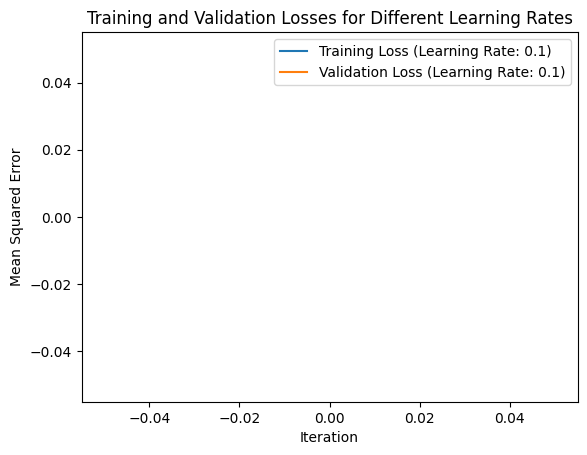

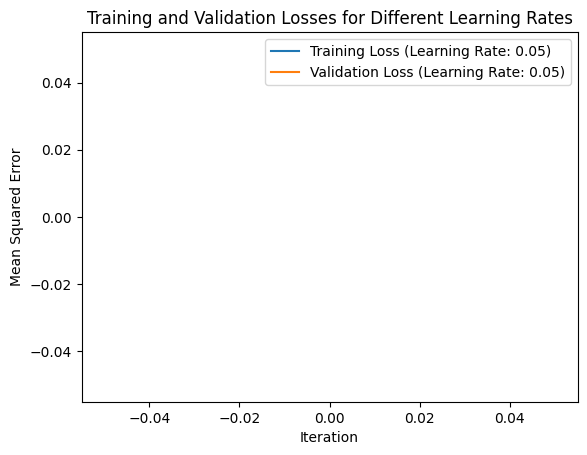

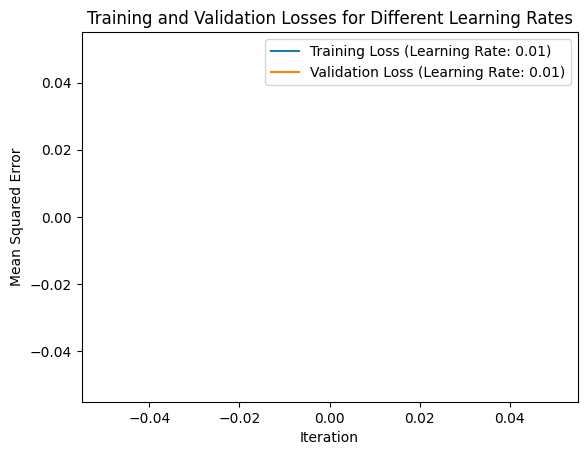

Best Learning Rate: None
Best MSE: inf
lowest validation loss: inf
Best Theta: None


(None, inf, None)

In [6]:

from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming df is your DataFrame with columns: 'area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price'
# ...

# Define the preprocess_data_2 function
def preprocess_data_1(df_new):
    X = df_new[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
    y = df_new['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m

# Preprocess the data
X, y, m = preprocess_data_1(df_new)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.1,0.05,0.01]
iterations = 50

# Define the gradient descent function

def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  cost_history = np.zeros(iterations)
  for i in range(iterations):
      predictions = X.dot(theta)

      errors = predictions - y
      theta -= (alpha / m) * (X.T.dot(errors))
      cost_history[i] = compute_cost(X, y, theta)
  return theta, cost_history

def compute_cost(X, y, theta):
  m = len(y)
  predictions = X.dot(theta)
  errors = predictions - y
  J = 1 / (2 * m) * np.sum(errors**2)
  return J

def train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations):
    best_mse = float('inf')
    best_learning_rate = None
    best_theta = None

    for alpha in learning_rates:
        train_losses = []  # Reset train_losses for each learning rate
        val_losses = []  # Reset val_losses for each learning rate
        theta = np.zeros(X_train.shape[1])  # Initialize theta for each learning rate

        for iteration in range(iterations):
            theta, cost_history = gradient_descent(X_train, y_train, theta.copy(), alpha, iterations)
            train_loss = compute_cost(X_train, y_train, theta)
            val_loss = compute_cost(X_val, y_val, theta)

            train_losses.append(train_loss)
            val_losses.append(val_loss)

# Track best MSE and parameters
        if val_loss < best_mse:
            best_mse = val_loss
            best_learning_rate = alpha
            best_theta = theta.copy()

        plt.plot(train_losses, label=f"Training Loss (Learning Rate: {alpha})")
        plt.plot(val_losses, label=f"Validation Loss (Learning Rate: {alpha})")

        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error")
        plt.legend()
        plt.title("Training and Validation Losses for Different Learning Rates")

        plt.show()

    print(f'Best Learning Rate: {best_learning_rate}')
    print(f'Best MSE: {best_mse}')
    print(f'lowest validation loss: {min(val_losses)}')
    print(f'Best Theta: {best_theta}')

    return best_learning_rate, best_mse, best_theta

# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)



#Answer 1a
Identify the best parameters for your linear regression model, based on the above input variables.

1. **Best Learning Rate**: None
   - This means that during the training process, no learning rate was identified as the best.

2. **Best MSE**: inf (Infinity)
   - An MSE value of infinity suggests that the model's predictions are extremely far from the actual target values.


4. **Best Theta**: None
   - The variable `theta` represents the model parameters. In this case, it was not successfully updated during training, resulting in None.

Possible reasons for this outcome could include: As we proceed with question 2 and 3 it will be more clear that how important is data standardization and normalization  in prerocess method before training data

- **Issues with the Data**: There may be anomalies or irregularities in the dataset that are causing difficulties for the model to learn.It needs prerocessing before training the model

Question1.(b)


1.b) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.


In [ ]:
selected_columns_new = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking','price']
df_new_b = df[selected_columns_new].copy()


In [ ]:
# List of variables to map
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})
# Applying the function to the housing list
df_new_b[varlist] = df_new_b[varlist].apply(binary_map)


In [ ]:
# scaler = MinMaxScaler()
# # Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# num_vars_b = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking']

# df_new_b[num_vars_b] = scaler.fit_transform(df_new_b[num_vars_b])


<ipython-input-32-10f319576c8c>:44: RuntimeWarning: overflow encountered in square
  J = 1 / (2 * m) * np.sum(errors**2)
<ipython-input-32-10f319576c8c>:36: RuntimeWarning: invalid value encountered in subtract
  theta -= (alpha / m) * (X.T.dot(errors))


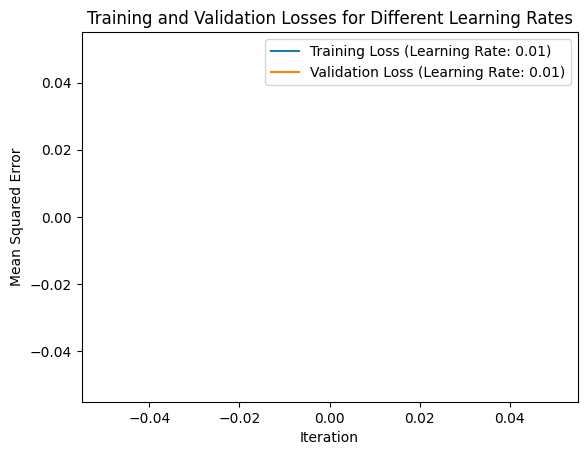

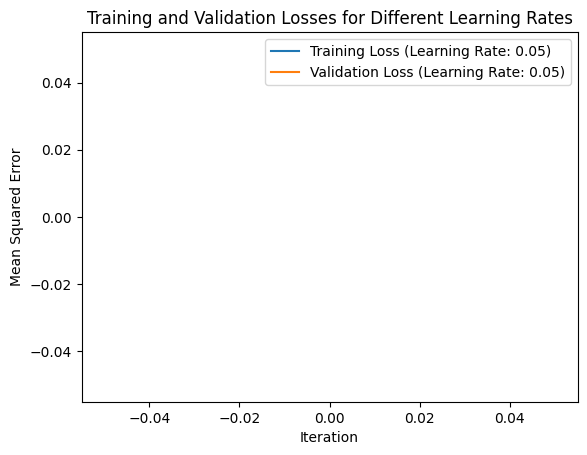

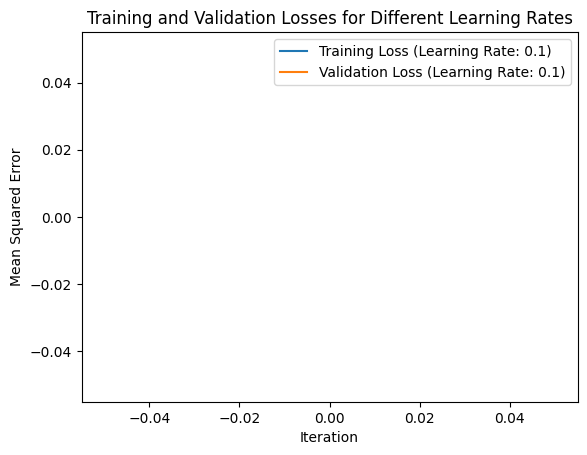

Best Learning Rate: None
Best MSE: inf
lowest validation loss: inf
Best Theta: None


(None, inf, None)

In [ ]:
# Define the preprocess_data_2 function
def preprocess_data_1b(df_new_b):
    X = df_new_b[['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking']].values
    y = df_new_b['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m


# Preprocess the data
X, y, m = preprocess_data_1b(df_new_b)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.01, 0.05, 0.1]
iterations = 30

# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)


#Answer 1b
Here we see the same trend although we tried to add few more features but got similar result.
Identify the best parameters for your linear regression model, based on the above input variables.

1. **Best Learning Rate**: None
   - This means that during the training process, no learning rate was identified as the best.

2. **Best MSE**: inf (Infinity)
   - An MSE value of infinity suggests that the model's predictions are extremely far from the actual target values.


4. **Best Theta**: None
   - The variable `theta` represents the model parameters. In this case, it was not successfully updated during training, resulting in None.

Possible reasons for this outcome could include: As we proceed with question 2 and 3 it will be more clear that how important is data standardization and normalization  in prerocess method before training data

- **Issues with the Data**: Data needs preprocessing (normalize or standardize) There may be anomalies or irregularities in the dataset that are causing difficulties for the model to learn.It needs prerocessing before training the model